# Result Analysis

This is a notebook where we analyze the student + teacher model outputs.

In [198]:
import json
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline


In [199]:
with open('./etk/data/gsm8k/dev_idxs.json') as f:
    idxs = json.load(f)

In [200]:
with open('./etk/few_shot/results/gpt-j-full-pass100.json') as f:
    gptj_results = json.load(f)

print(gptj_results['passk'])

gptj_results = gptj_results['log']

gptj_results = [ex for ex in gptj_results if ex['task_id'] not in idxs]

print(gptj_results[0])

0.3971631205673759
{'task_id': 0, 'text': '# Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 72, 'gold_solution': ' \nn0 = 48.0\nn1 = 24.0\nn2 = 15.0\nn3 = 90.0\nn4 = 48.0\nn5 = 24.0\nn6 = 15.0\nn7 = 90.0\nn8 = 48.0\nt0 = n4 + n5\nt1 = n0 + n1\nt2 = n3 / n0\nt3 = n4 / t1\nt4 = n5 * t2\nt5 = t3 + t4\nt6 = n3 * t5\nt7 = t6 / n7\nt8 = t7 - t4\nanswer = t0', 'passk': 1, 'pass1': 0.01, 'passed_lst': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [201]:
gptj_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in gptj_results if ex['gold_solution'] is not False]

print(sum(gptj_soln_lens) / len(gptj_soln_lens))

10.818931516672643


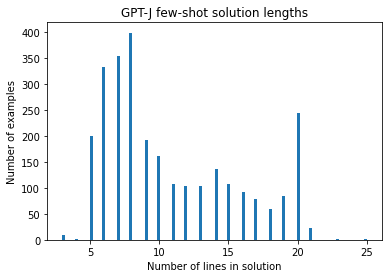

In [202]:
plt.hist(gptj_soln_lens, bins=100)
plt.title('GPT-J few-shot solution lengths')

plt.xlabel('Number of lines in solution')
plt.ylabel('Number of examples')
plt.show()

In [203]:
with open('./etk/few_shot/results/gptneo2B_gsm8k_full_pass100.json') as f:
    gptneo_results = json.load(f)

print(gptneo_results['passk'])

gptneo_results = gptneo_results['log']

gptneo_results = [ex for ex in gptneo_results if ex['task_id'] not in idxs]

print(gptneo_results[0])
gptneo_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in gptneo_results if ex['gold_solution'] is not False]

0.19470092332396627
{'task_id': 0, 'text': '# Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 72, 'gold_solution': False, 'passk': 0, 'pass1': 0.0, 'passed_lst': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}


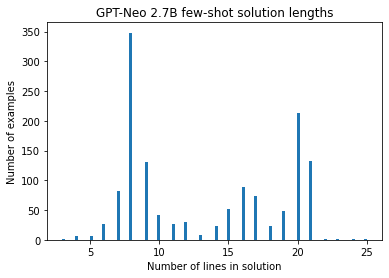

In [204]:
plt.hist(gptneo_soln_lens, bins=100)
plt.title('GPT-Neo 2.7B few-shot solution lengths')
plt.xlabel('Number of lines in solution')
plt.ylabel('Number of examples')
plt.show()

In [205]:
with open('./etk/few_shot/results/codex_gsm8k_full_pass100.json') as f:
    codex_results = json.load(f)

print(codex_results['passk'])

codex_results = codex_results['log']

codex_results = [ex for ex in codex_results if ex['task_id'] not in idxs]

print(codex_results[0])
codex_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_results if ex['gold_solution'] is not False]

0.9297470895222802
{'task_id': 0, 'text': '# Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?', 'answer': 72, 'gold_solution': '\nn0 = 48.0\nn1 = 0.5\nn2 = 2.0\nt0 = n0 * n1\nanswer = n0 + t0\n', 'passk': 1, 'pass1': 0.4, 'passed_lst': [False, False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False, False, False, True, True, True, False, False, False, False, False, True, False, False, True, True, False, False, True, False, True, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, True, True, False, True, False, True, False, False, True, False, False, True, False, False, True, True, False, True, False, True, False, False, False, True, True, False, True, False, True, False, False, True, True, True, Tr

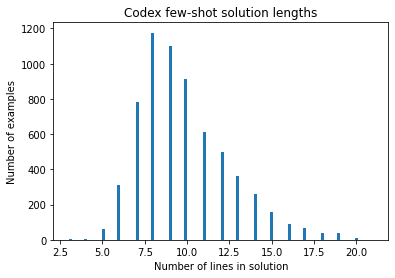

In [206]:
plt.hist(codex_soln_lens, bins=100)
plt.title('Codex few-shot solution lengths')
plt.xlabel('Number of lines in solution')
plt.ylabel('Number of examples')
plt.show()

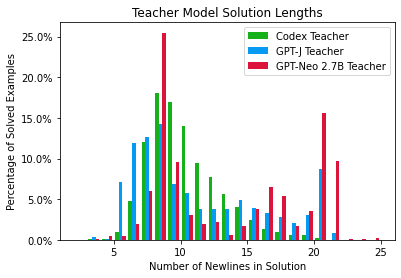

In [207]:
colors = ['xkcd:green', 'xkcd:azure', 'crimson']
plt.hist((codex_soln_lens, gptj_soln_lens, gptneo_soln_lens), 23, range=[2, 25], weights=(np.ones(len(codex_soln_lens)) / len(codex_soln_lens), 
                                                                                        np.ones(len(gptj_soln_lens)) / len(gptj_soln_lens), 
                                                                                        np.ones(len(gptneo_soln_lens)) / len(gptneo_soln_lens)), 
                                                                                        histtype='bar', color=colors, label=["Codex Teacher", "GPT-J Teacher", "GPT-Neo 2.7B Teacher"])
plt.title('GPT-J, GPT-Neo 2.7B, and Codex solution lengths')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(prop={'size': 10})
plt.title('Teacher Model Solution Lengths')
plt.xlabel('Number of Newlines in Solution')
plt.ylabel('Percentage of Solved Examples')
plt.savefig('teacher_lens.png')
plt.show()

In [208]:
with open('./etk/few_shot/gsm8k_prompt.txt') as f:
    prompts = f.read()

print([prompts])
# 7
# 7
# 20

["# The total average age of three friends is 40. Jared is ten years older than Hakimi, and Molly's age is 30. How old is Hakimi?\nn0 = 40 \nn1 = 10 \nn2 = 30 \nt0 = 3 * n0 \nt1 = t0 - n2\nanswer = (t1 - n1) / 2\n\n# A carpenter worked alone for 1 day on a job that would take him 7 more days to finish. He and another carpenter completed the job in 4 more days. How many days would it have taken the second carpenter to do the complete job working alone? \nn0 = 1.0\nn1 = 7.0\nn2 = 4.0\nt0 = n0 + n1\nt1 = n2 * t0\nanswer = t1 / 2.0\n\n# In two alloys, copper and tin are related in the ratios of 4 : 1 and 1 : 3. 10 kg of ist alloy, 16 kg of the 2nd alloy and some pure copper are melted together. An alloy is obtained in which the ratio of copper and tin was 3 : 2 . Find the weight of the new alloy. \nn0 = 4.0\nn1 = 1.0\nn2 = 1.0\nn3 = 3.0\nn4 = 10.0\nn5 = 16.0\nn6 = 2.0\nn7 = 3.0\nn8 = 2.0\nt0 = n4 + n5\nt1 = n0 + n1\nt2 = n3 / n0\nt3 = n4 / t1\nt4 = n5 * t2\nt5 = t3 + t4\nt6 = n3 * t5\nt7 =

## Student solution length distributions

0.1819560272934041
{'task_id': 0, 'text': "# Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?", 'answer': 18, 'gold_solution': False, 'passk': 0, 'pass1': 0.0, 'passed_lst': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

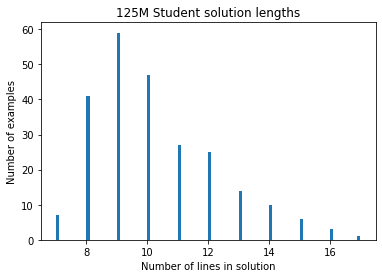

In [209]:
# get codex dev results
with open('./etk/full_supervision/train_results/codex_teacher_pass100_gptneo125M_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_results = json.load(f)

print(codex_results['pass@100'])

codex_results = codex_results['log']

# codex_results = [ex for ex in codex_results if ex['task_id'] in idxs]

print(codex_results[0])
codex_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_results if ex['gold_solution'] is not False]

plt.hist(codex_soln_lens, bins=100)
plt.title('125M Student solution lengths')
plt.xlabel('Number of lines in solution')
plt.ylabel('Number of examples')
plt.show()

In [210]:
with open('./etk/full_supervision/train_results/paper_runs/codex_teacher_pass100_gptneo125M_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_results = json.load(f)
codex_results = codex_results['log']
codex_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_results if ex['gold_solution'] is not False]


with open('./etk/full_supervision/train_results/paper_runs/gptneo2B_teacher_pass100_gptneo125M_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    neo_results = json.load(f)
neo_results = neo_results['log']
neo_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in neo_results if ex['gold_solution'] is not False]

with open('./etk/full_supervision/train_results/paper_runs/gptj_teacher_pass100_gptneo125M_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    gptj_results = json.load(f)
gptj_results = gptj_results['log']
gptj_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in gptj_results if ex['gold_solution'] is not False]

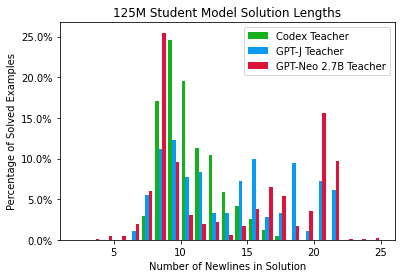

In [211]:
plt.hist((codex_soln_lens, gptj_soln_lens, gptneo_soln_lens), 23, range=[2, 25], weights=(np.ones(len(codex_soln_lens)) / len(codex_soln_lens), 
                                                                                        np.ones(len(gptj_soln_lens)) / len(gptj_soln_lens), 
                                                                                        np.ones(len(gptneo_soln_lens)) / len(gptneo_soln_lens)), 
                                                                                        histtype='bar', color=colors, label=["Codex Teacher", "GPT-J Teacher", "GPT-Neo 2.7B Teacher"])
plt.title('GPT-J, GPT-Neo 2.7B, and Codex solution lengths')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(prop={'size': 10})
plt.title('125M Student Model Solution Lengths')
plt.xlabel('Number of Newlines in Solution')
plt.ylabel('Percentage of Solved Examples')
plt.savefig('125m_student_lens.png')
plt.show()

In [212]:
with open('./etk/full_supervision/train_results/paper_runs/codex_teacher_pass100_gptneo1B_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_results = json.load(f)
print(codex_results['pass@100'])
codex_results = codex_results['log']
codex_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_results if ex['gold_solution'] is not False]


with open('./etk/full_supervision/train_results/paper_runs/gptneo2B_teacher_pass100_gptneo1B_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    neo_results = json.load(f)
print(neo_results['pass@100'])
neo_results = neo_results['log']
neo_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in neo_results if ex['gold_solution'] is not False]

with open('./etk/full_supervision/train_results/paper_runs/gptj_teacher_pass100_gptneo1B_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    gptj_results = json.load(f)
print(gptj_results['pass@100'])
gptj_results = gptj_results['log']
gptj_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in gptj_results if ex['gold_solution'] is not False]

0.3290371493555724
0.08718726307808947
0.12357846853677028


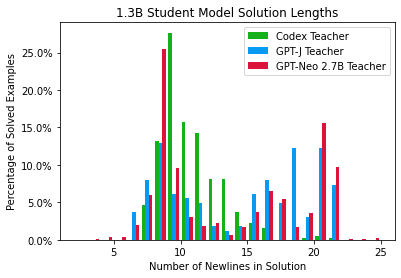

In [213]:
plt.hist((codex_soln_lens, gptj_soln_lens, gptneo_soln_lens), 23, range=[2, 25], weights=(np.ones(len(codex_soln_lens)) / len(codex_soln_lens), 
                                                                                        np.ones(len(gptj_soln_lens)) / len(gptj_soln_lens), 
                                                                                        np.ones(len(gptneo_soln_lens)) / len(gptneo_soln_lens)), 
                                                                                        histtype='bar', color=colors, label=["Codex Teacher", "GPT-J Teacher", "GPT-Neo 2.7B Teacher"])
plt.title('GPT-J, GPT-Neo 2.7B, and Codex solution lengths')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(prop={'size': 10})
plt.title('1.3B Student Model Solution Lengths')
plt.xlabel('Number of Newlines in Solution')
plt.ylabel('Percentage of Solved Examples')
plt.savefig('1b_student_lens.png')
plt.show()

## Overlap between solved problems and not

In [265]:
with open('./etk/full_supervision/train_results/paper_runs/codex_teacher_pass100_gptneo1B_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_student_results = json.load(f)
print(codex_student_results['pass@100'])
codex_student_results = codex_student_results['log']
codex_student_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_student_results if ex['gold_solution'] is not False]

with open('./etk/few_shot/results/codex_pass100_test.json') as f:
    codex_teacher_results = json.load(f)
print(codex_teacher_results['passk'])
codex_teacher_results = codex_teacher_results['log']
codex_teacher_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_teacher_results if ex['gold_solution'] is not False]



0.3290371493555724
0.9234268385140257


In [215]:
common = 0
teacher_total = 0
student_total = 0
for student_task, teacher_task in zip(codex_student_results, codex_teacher_results):
    if teacher_task['gold_solution'] is not False:
        teacher_total += 1
    if student_task['gold_solution'] is not False:
        student_total += 1
    if student_task['gold_solution'] is not False and teacher_task['gold_solution'] is not False:
        print(student_task['gold_solution'])
        print(teacher_task['gold_solution'])
        print(student_task['gold_solution'].split('\n') == teacher_task['gold_solution'].split('\n'))
        common += 1

print(common, teacher_total, student_total)



n0 = 1.0
n1 = 4.0
n2 = 6.0
n3 = 10.0
t0 = n0 + n1
t1 = n2 + n3
t2 = t1 + n2
t3 = n3 / n0
t4 = t3 / n1
t5 = t4 / t2
t6 = t5 / t4
t7 = t6 / n3
t8 = t7 / n2
answer = t0 + t8


n0 = 10
n1 = 6.0
n2 = 1.0
t0 = n0 + n1
t1 = n2 * t0
answer = (t1 - n1) / 2.0

False

 
n0 = 4.0
n1 = 1.0
n2 = 1.0
n3 = 3.0
n4 = 1.0
n5 = 1.0
n6 = 1.0
n7 = 1.0
n8 = 1.0
t0 = n4 + n5
t1 = n6 + n7
t2 = n8 + n6
t3 = n3 + n5
t4 = n2 + n4
t5 = n1 + n8
t6 = n0 + n3
t7 = n6 + n5
t8 = n7
answer = t0
 
n0 = 3
n1 = 2
n2 = 1
n3 = 1
n4 = 4
n5 = 2
n6 = 6
n7 = 1
n8 = 5
answer = (n8 - n7) / 2

False


n0 = 4.0
n1 = 6.0
n2 = 3.0
n3 = 2.0
n4 = 4.0
n5 = 3.0
n6 = 2.0
n7 = 1.0
n8 = 0.0
t0 = n0 + n1
t1 = n1 + n2
t2 = n0 + n3
t3 = n4 + n5
t4 = n6 + n7
t5 = n8 + n1
t6 = n2 + n3
t7 = n0 + n4
answer = t0 + t7


n0 = 3.0
n1 = 6.0
n2 = 4.0
t0 = n0 + n1
t1 = n2 * t0
answer = t1 / 2.0

False

 
n0 = 3.0
n1 = 2.0
n2 = 1.0
n3 = 7.0
n4 = 8.0
n5 = 6.0
n6 = 5.0
n7 = 4.0
n8 = 3.0
t0 = n0 + n1
t1 = n2 + n3
t2 = n4 + n5
t3 = n6 + n7
t4 = n8
answer = t

In [228]:
import matplotlib

colors = matplotlib.cm.get_cmap('Set2').colors
print(colors[:2])

((0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961))


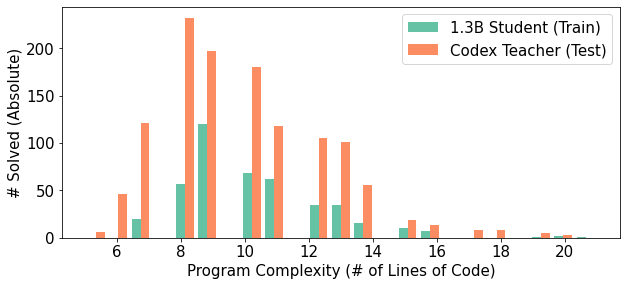

In [266]:
# colors = ['xkcd:green', 'crimson']
plt.rcParams["figure.figsize"] = (10, 4.25)
matplotlib.rcParams.update({'font.size': 15})
plt.hist((codex_student_soln_lens, codex_teacher_soln_lens), 23, range=[5, 21], 
                                                                                        histtype='bar', color=colors[:2], label=["1.3B Student (Train)", "Codex Teacher (Test)"])

plt.legend(prop={'size': 15})
plt.xlabel('Program Complexity (# of Lines of Code)')
plt.ylabel('# Solved (Absolute)')
plt.savefig('student_teacher.png', dpi=1800, bbox_inches='tight')
plt.show()

In [ ]:
import csv
  
  
# field names 
# fields = ['Name', 'Branch', 'Year', 'CGPA'] 
    
# data rows of csv file 
rows = [ codex_student_soln_lens, codex_teacher_soln_lens] 
        
  
with open('samplecsv.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    for row in zip(codex_student_soln_lens, codex_teacher_soln_lens):
        write.writerow(row)
    for row in codex_teacher_soln_lens[len(codex_student_soln_lens):]:
        write.writerow([0, row])
    

In [263]:
with open('./etk/full_supervision/train_results/paper_runs/gptneo2B_teacher_pass100_gptneo125M_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_student_results = json.load(f)
print(codex_student_results['pass@100'])
codex_student_results = codex_student_results['log']
codex_student_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_student_results if ex['gold_solution'] is not False]

with open('./etk/few_shot/results/gptneo2B_pass100_test.json') as f:
    codex_teacher_results = json.load(f)
print(codex_teacher_results['passk'])
codex_teacher_results = codex_teacher_results['log']
codex_teacher_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_teacher_results if ex['gold_solution'] is not False]



0.10841546626231995
0.13040181956027294


KeyboardInterrupt: 

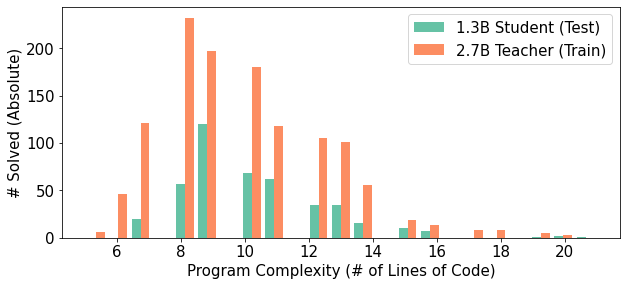

In [262]:
plt.rcParams["figure.figsize"] = (10, 4.25)
matplotlib.rcParams.update({'font.size': 15})
plt.hist((codex_student_soln_lens, codex_teacher_soln_lens), 23, range=[5, 21], 
                                                                                        histtype='bar', color=colors[:2], label=["1.3B Student (Test)", "2.7B Teacher (Train)"])

plt.legend(prop={'size': 15})
plt.xlabel('Program Complexity (# of Lines of Code)')
plt.ylabel('# Solved (Absolute)')
plt.savefig('neo_student_teacher.png', dpi=1800, bbox_inches='tight')
plt.show()

0.10841546626231995
0.19470092332396627


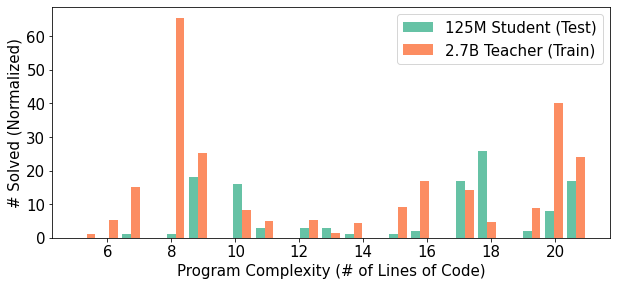

In [269]:
with open('./etk/full_supervision/train_results/paper_runs/gptneo2B_teacher_pass100_gptneo1B_student_validation_pass1_standard_params_test_100/generated_programs_log.json') as f:
    codex_student_results = json.load(f)
print(codex_student_results['pass@100'])
codex_student_results = codex_student_results['log']
codex_student_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_student_results if ex['gold_solution'] is not False]

with open('./etk/few_shot/results/gptneo2B_gsm8k_full_pass100.json') as f:
    codex_teacher_results = json.load(f)
print(codex_teacher_results['passk'])
codex_teacher_results = codex_teacher_results['log']
codex_teacher_soln_lens = [len(ex['gold_solution'].split('\n')) for ex in codex_teacher_results if ex['gold_solution'] is not False]


plt.rcParams["figure.figsize"] = (10, 4.25)
matplotlib.rcParams.update({'font.size': 15})
plt.hist((codex_student_soln_lens, codex_teacher_soln_lens), 23, range=[5, 21], weights = (np.ones(len(codex_student_soln_lens)), np.ones(len(codex_teacher_soln_lens)) / 7473 * 1320),
                                                                                        histtype='bar', color=colors[:2], label=["1.3B Student (Test)", "2.7B Teacher (Train)"])

plt.legend(prop={'size': 15})
plt.xlabel('Program Complexity (# of Lines of Code)')
plt.ylabel('# Solved (Normalized)')
plt.savefig('neo_student_teacher_weighted.png', dpi=1800, bbox_inches='tight')
plt.show()